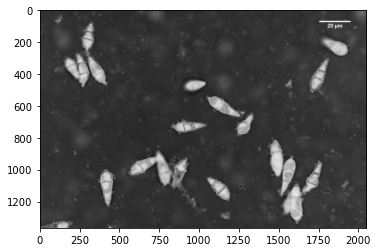

count= 20


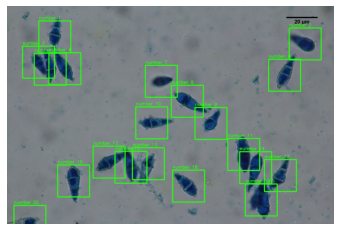

True

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread("pyri02.jpg") ### or if you want another picture just change to 'pyri02.jpg'
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img=~img
img=(img/np.max(img)*255).astype(np.uint8)

plt.imshow(img,cmap='gray')
plt.show()
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4
kernel=np.ones((40,40),np.uint8)
op=cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel)
output = cv2.connectedComponentsWithStats(op, connectivity, cv2.CV_32S)

num_count = output[0]-1 #### if not minus, num_count would could background as a component
labels = output[1]
stats = output[2]
centroids = output[3]

print('count=',num_count)

for i in range(1,centroids.shape[0]):
  h=centroids[i]
  cv2.rectangle(img_rgb, (int(h[0])-100, int(h[1])-100), (int(h[0])+100, int(h[1])+100), (36,255,12), 6)
  cv2.putText(img_rgb, 'number '+str(i), (int(h[0])-100, int(h[1])-100-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

resulted_image=np.array(img_rgb)
plt.axis("off")
plt.imshow(resulted_image)
plt.show()
cv2.imwrite('resulted_image.jpg',cv2.cvtColor(resulted_image,cv2.COLOR_RGB2BGR))

